<a href="https://colab.research.google.com/github/sgangavaram/FMML2023/blob/LAB-3/Module_01_Lab_03_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::1200,:,:].copy()
train_y = train_y[::1200].copy()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label
def NN(traindata, trainlabel, testdata):
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [5]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without the augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without the augmentation is  0.6472


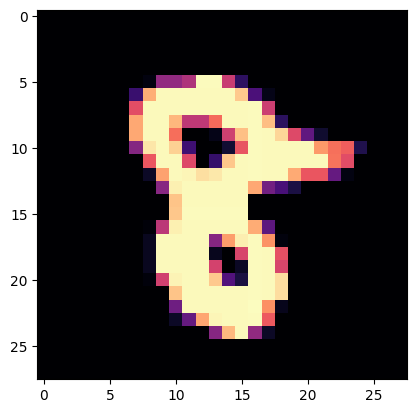

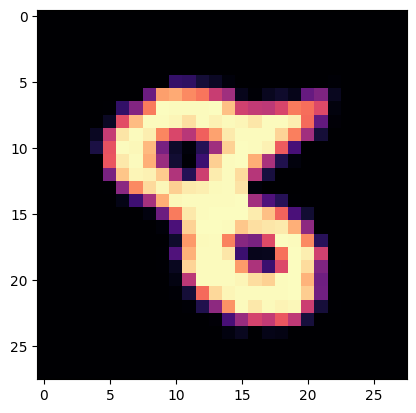

In [10]:
plt.imshow(train_X[2], cmap='magma')
plt.show()
plt.imshow(rotate(train_X[2],25), cmap='magma')

In [11]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample)

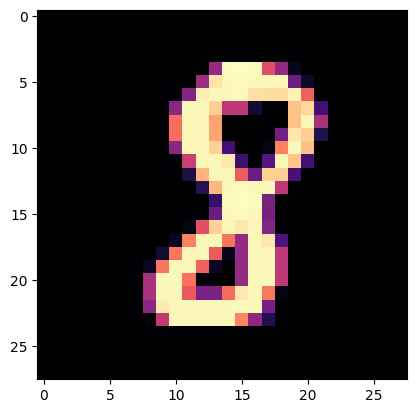

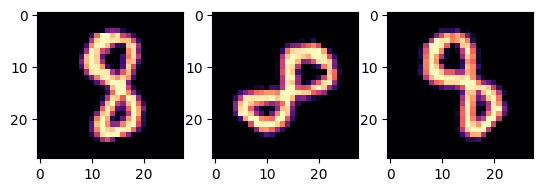

In [13]:
sample = train_X[20]
angleconstraint = 90
plt.imshow(sample, cmap='magma')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='magma')
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='magma')
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='magma')

In [14]:
angleconstraint = 60
naugmentations = 5

augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint)))
  auglabel = np.concatenate((auglabel, train_y))

testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

Accuracy after rotation augmentation is  0.6671


In [15]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90]
accuracies = np.zeros(len(angleconstraints), dtype=np.float)

for ii in range(len(angleconstraints)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-15-f2ffdc32f2fd>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float)


Accuracy after rotation augmentation constrained by  0  is  0.6472
Accuracy after rotation augmentation constrained by  10  is  0.6695
Accuracy after rotation augmentation constrained by  20  is  0.6794
Accuracy after rotation augmentation constrained by  30  is  0.6792
Accuracy after rotation augmentation constrained by  40  is  0.6737
Accuracy after rotation augmentation constrained by  50  is  0.6749
Accuracy after rotation augmentation constrained by  60  is  0.681
Accuracy after rotation augmentation constrained by  70  is  0.6579
Accuracy after rotation augmentation constrained by  80  is  0.6473
Accuracy after rotation augmentation constrained by  90  is  0.6483


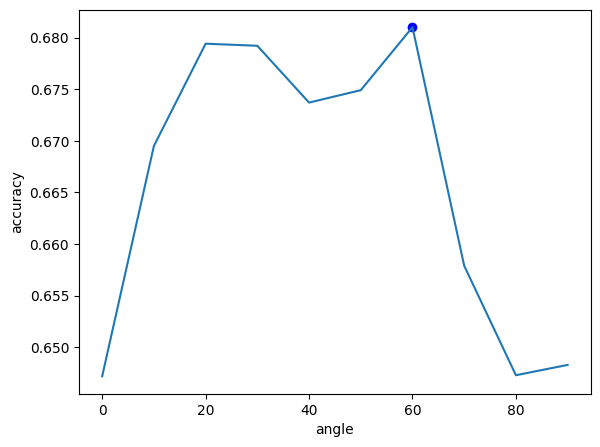

In [17]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='blue')

In [18]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount)
  img = warp(sample, tform)
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

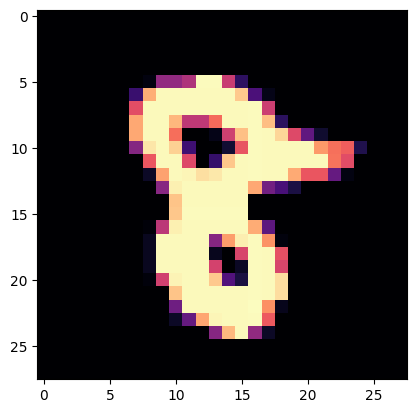

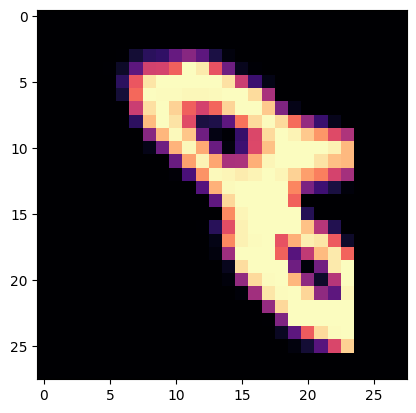

In [20]:
sample = train_X[2]
plt.imshow(sample, cmap='magma')
plt.show()
plt.imshow(shear(sample, 0.5), cmap='magma')

In [21]:
def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample)

In [22]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
accuracies = np.zeros(len(shearconstraints), dtype=np.float)

for ii in range(len(shearconstraints)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-22-20e694a3e3d1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float)


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6157
Accuracy after shear augmentation constrained by  0.4  is  0.6293
Accuracy after shear augmentation constrained by  0.6  is  0.6518
Accuracy after shear augmentation constrained by  0.8  is  0.6562
Accuracy after shear augmentation constrained by  1.0  is  0.6421
Accuracy after shear augmentation constrained by  1.2  is  0.6438
Accuracy after shear augmentation constrained by  1.4  is  0.6361
Accuracy after shear augmentation constrained by  1.6  is  0.6263
Accuracy after shear augmentation constrained by  1.8  is  0.6211
Accuracy after shear augmentation constrained by  2.0  is  0.6202


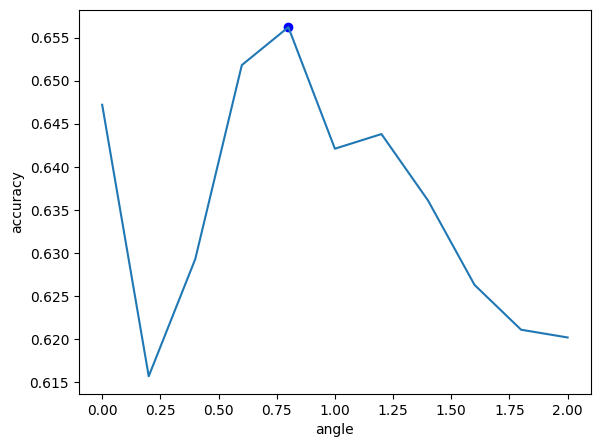

In [24]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='blue')

In [25]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii])
  return np.squeeze(nsample)

In [27]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
angleconstraints = [0,10,20,30,40,50]
hyp = cartesian((shearconstraints, angleconstraints))
accuracies = np.zeros(len(hyp), dtype=np.float)

for ii in range(len(hyp)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1])))
    auglabel = np.concatenate((auglabel, train_y))
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

<ipython-input-27-07bf52ba150f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float)


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6258
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.6089
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.5876
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.5948
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6227
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6341
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.5972
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.6039
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5887
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.6003
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.5906
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6341
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.6147
Accuracy after augmentation shear: 0.4 angle: 20.0  is  0.5957
Accuracy after augmentation shear: 0.4 angle: 30.0  is  0.

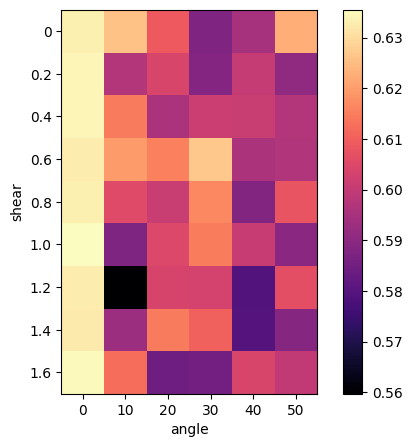

In [28]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='magma')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

## Questions
1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
2. Can you increase the accuracy by increasing the number of augmentations from each sample?
3. Try implementing a few augmentations of your own and experimenting with them. A good reference is <a href=https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/>here. </a>
4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?


1. The best value for angel constraint: 0 and shear constraint: 1.0. The accurary improved by 0.2865 as augmentations were used.

2. Increasing the number of augmentations from each sample can sometimes lead to improved model accuracy, but it depends on several factors, including the specific dataset, the quality of the augmentation techniques, and the machine learning model being used.


4. A few hundred samples will be the smallest training dataset you can take to get above 50% but it is always preferable to take large datasets. Mnist uses arounf 60,000 samples which provides more accurate information.